# Introduction

**Objective**<br>
* Build a model to predict movie genres based on plot summaries and other textual information.

**About dataset**
* This dataset is obtained from [Movie Genre Classification | Kaggle](https://www.kaggle.com/code/imgowthamg/movie-genre-classification)

**Main Instructions**
* Exploratory analysis from the data, create some visualization to describe the data
* Describe the pre-processing steps, also the reason behind them
* Split the data into training and testing with optional portion
* Build the models with matching hyperparameter tune, choose the best model, also the reason behind that
* Test the model with data test

# Topic

Movie Genre Classification<br>


**Details**<br>
Name        : V.Vignesh<br>
Age         : 21<br>
Place       : Krishnagiri<br>
Studying at : Amrita University,Coimbatore





In [293]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.12.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load and Describe Data

## Load Data

In [3]:
train_path = "C:/Users/Administrator/Downloads/archive (3)/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')



In [8]:
print(train_data.head(10))

                                 Title          Genre  \
1        Oscar et la dame rose (2009)          drama    
2                        Cupid (1997)       thriller    
3    Young, Wild and Wonderful (1980)          adult    
4               The Secret Sin (1915)          drama    
5              The Unrecovered (2007)          drama    
6              Quality Control (2011)    documentary    
7                  "Pink Slip" (2009)         comedy    
8                One Step Away (1985)          crime    
9            "Desperate Hours" (2016)     reality-tv    
10                   Spirits (2014/I)         horror    

                                          Description  
1    Listening in to a conversation between his do...  
2    A brother and sister with a past incestuous r...  
3    As the bus empties the students for their fie...  
4    To help their unemployed father make ends mee...  
5    The film's title refers not only to the un-re...  
6    Quality Control consists of a s

In [6]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [5]:
print('There are',str(len(train_data)), 'rows in this dataset')

There are 54214 rows in this dataset


## Describe Data

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


**Conclusion**</br>
* There are 54214 rows in this dataset

# Exploratory Data Analysis

## Statistical Summary

### Separation of Categorical and Numerical Data

In [13]:
cats = ['Title','Genre','Description']
nums = ['There are no numerical columns specified in the provided data']

### Statistical Categorical Data

In [16]:
train_data[cats].describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


**Categorical Data Conclusion**</br>

Categorical columns (cats):

*Title: Since each movie title is unique, it is categorical.<br>
*Genre: There are 27 unique genres, making it a categorical column.<br>
*Description: Most descriptions are unique, so it is also a categorical column.

## Visualization

### Univariate Analysis

In [17]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train_data.select_dtypes(include=numerics).columns)
print(train_data.select_dtypes(include=numerics).shape)
data_num = train_data.select_dtypes(include=numerics)
data_num.head(3)

Index([], dtype='object')

(54214, 0)


""
1
2
3


In [18]:
# assign the categorical data into cats object
display(train_data.select_dtypes(include=['object']).columns)
print(train_data.select_dtypes(include=object).shape)
data_cat = train_data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['Title', 'Genre', 'Description'], dtype='object')

(54214, 3)


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


# Box_Plot graph

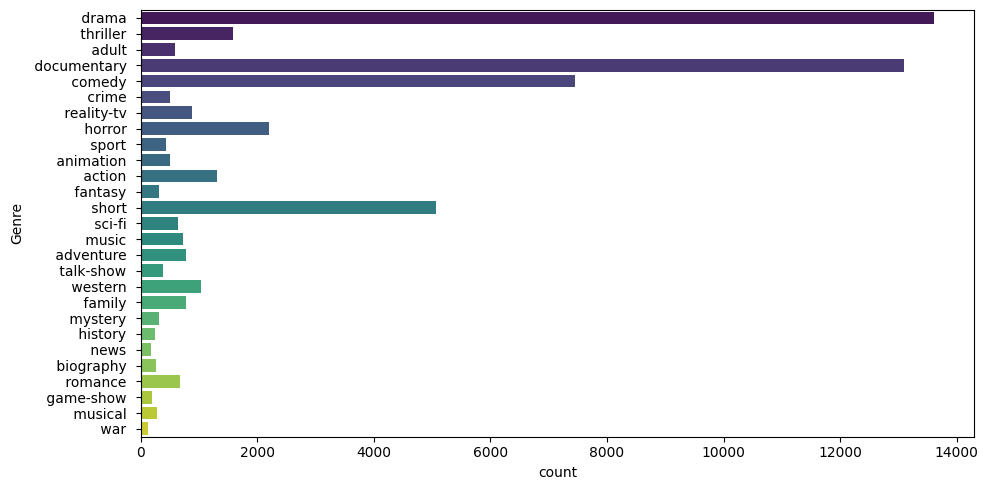

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_path = "C:/Users/Administrator/Downloads/archive (3)/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

features = ['Genre']

plt.figure(figsize=(10, 5))

for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(y=train_data[features[i]], hue=train_data[features[i]], palette='viridis', legend=False)
    plt.tight_layout()

plt.show()


In the boxplot graphs above, it is evident that the features Title, Genre, and Description do not have outliers in the traditional sense, as they are categorical variables and typically visualized differently from numerical data.

In [31]:
#Know the unique value of each categorical data
train_data_cat_unique = data_cat.nunique().reset_index()
train_data_cat_unique.columns = ['fitur', 'unik nilai']
train_data_cat_unique = train_data_cat_unique.sort_values('unik nilai', ascending=False)
train_data_cat_unique

,fitur,unik nilai
0,Title,54214
2,Description,54086
1,Genre,27


### Multivariate Analysis

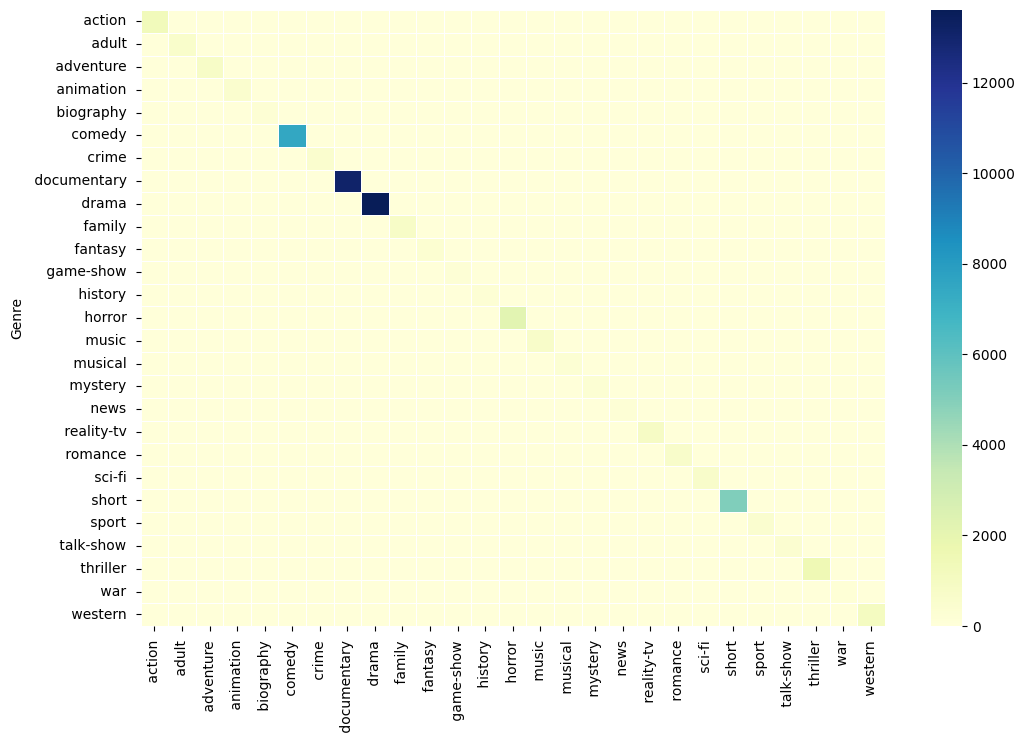

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is already loaded and contains the relevant data
features = ['Genre']

# Create a cross-tabulation (contingency table) for Genre
cross_tab = pd.crosstab(index=train_data['Genre'], columns=train_data['Genre'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", cbar=True, linewidths=.5, annot=False)
plt.title('')
plt.xlabel('')
plt.ylabel('Genre')
plt.show()


To identify strong positive correlations between genres, look for darker colors in the heatmap. Darker colors indicate that those genres frequently occur together, suggesting a stronger association between them.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12256\259032124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=train_data, palette='viridis')


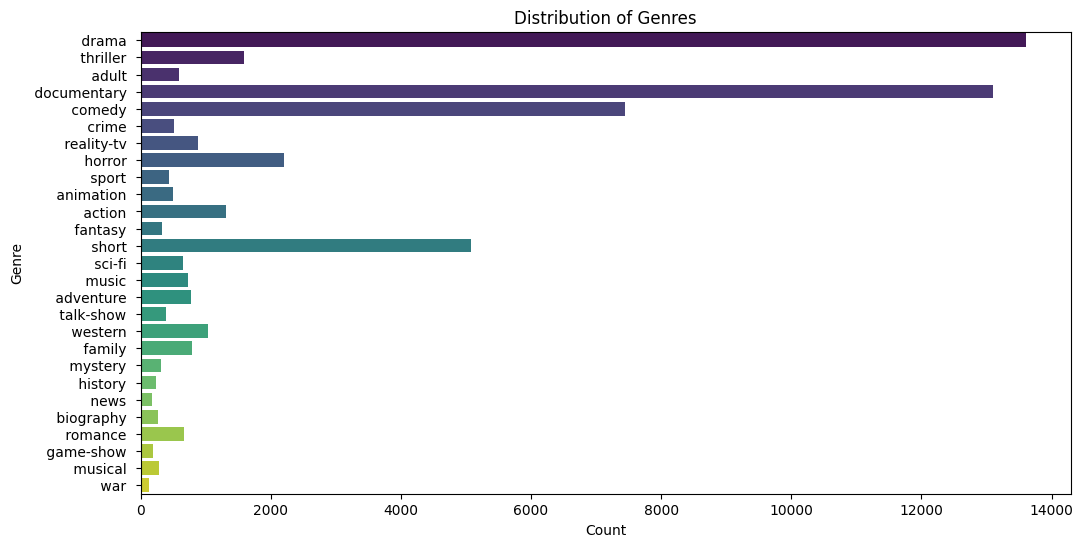

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=train_data, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


**Simple EDA**

**In some boxplot charts it can be seen that the data distribution is uneven and has lots of outliers and it can also be seen that the data distribution on the `No_Tags`, `Desc_len`, and `len_title` features is quite skewed.. </br>
</br>
Then when we look at the heatmap, we can see that there are several features that are positively correlated with the views of a video, such as `likes`, `dislikes`, `comment_count`, `No_tags`, and `desc_len`, so maybe some of these features are of feature importance for doing machine learning modeling**

# Data Preparation

In [307]:
# see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,trending_date,0
1,title,804
2,channel_title,804
3,category_id,804
4,publish_time,804
5,tags,1133
6,views,1133
7,likes,1133
8,dislikes,1133
9,comment_count,1133


In [308]:
# see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,publish_date,1462,3.86
1,len_title,1462,3.86
2,desc_len,1462,3.86
3,No_tags,1462,3.86
4,comments_disabled,1133,2.99
5,description,1133,2.99
6,video_error_or_removed,1133,2.99
7,ratings_disabled,1133,2.99
8,comment_count,1133,2.99
9,dislikes,1133,2.99


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

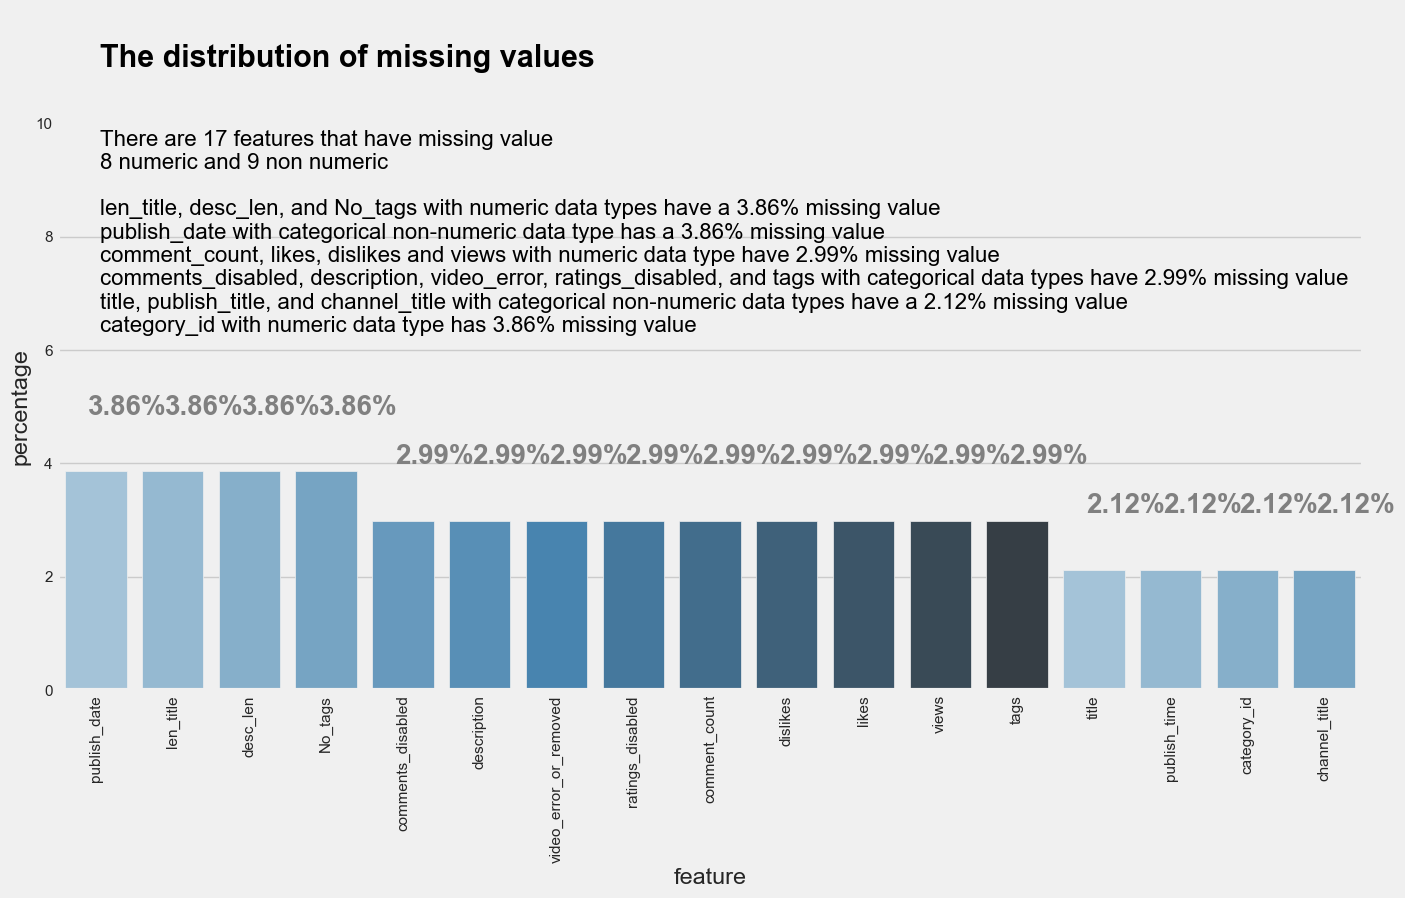

In [309]:
#View the distribution of missing values using the barplot
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+1, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
    
title = '''
The distribution of missing values'''
ax.text(0.05,11,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')    

text = '''
There are 17 features that have missing value
8 numeric and 9 non numeric

len_title, desc_len, and No_tags with numeric data types have a 3.86% missing value
publish_date with categorical non-numeric data type has a 3.86% missing value
comment_count, likes, dislikes and views with numeric data type have 2.99% missing value
comments_disabled, description, video_error, ratings_disabled, and tags with categorical data types have 2.99% missing value
title, publish_title, and channel_title with categorical non-numeric data types have a 2.12% missing value
category_id with numeric data type has 3.86% missing value

'''
ax.text(0.05,5.5,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax.set_ylim(0,10)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout
#plt.savefig('fig/distribusi nilai hilang.png');

## Drop Column 

In [310]:
columns_to_drop = ['category_id', 'publish_date', 'description', 'title', 'channel_title', 'tags', 'publish_time']
data_clean = data.drop(columns=columns_to_drop)

the `category_id`, `publish_date`, `description`, `tags`, `title`, `channel_title` features are removed because they have a very large number of unique values, so it is assumed that each row of data has a different value.

## Filling Missing Column with Mode

In [311]:
data_clean['comments_disabled'].value_counts()

comments_disabled
False    35611
True      1180
Name: count, dtype: int64

In [312]:
#fill in the comments_disabled value with mode
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])

In [313]:
data_clean['comments_disabled'].value_counts()

comments_disabled
False    36744
True      1180
Name: count, dtype: int64

In [314]:
data_clean['video_error_or_removed'].value_counts()

video_error_or_removed
False    36780
True        11
Name: count, dtype: int64

In [315]:
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])


In [316]:
data_clean['video_error_or_removed'].value_counts()

video_error_or_removed
False    37913
True        11
Name: count, dtype: int64

In [317]:
data_clean['ratings_disabled'].value_counts()

ratings_disabled
False    36034
True       757
Name: count, dtype: int64

In [318]:
#fill in the ratings_disabled value with mode
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])


In [319]:
data_clean['ratings_disabled'].value_counts()

ratings_disabled
False    37167
True       757
Name: count, dtype: int64

## Filling Missing Column with Median

In [320]:
#fill in the missing value with median
numeric_columns = data_clean.select_dtypes(include=np.number).columns
data_clean[numeric_columns] = data_clean[numeric_columns].fillna(data_clean[numeric_columns].median())
data_clean.head(3)

,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title
0,17.14.11,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,920.0,81.0
1,17.14.11,590101.0,735.0,904.0,0.0,True,False,False,19.0,2232.0,58.0
2,17.14.11,473988.0,2011.0,243.0,149.0,False,False,False,14.0,482.0,58.0


In [321]:
data_clean.isnull().sum()

trending_date             0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
No_tags                   0
desc_len                  0
len_title                 0
dtype: int64

## Duplicate Values

In [322]:
#see the number of duplicate data
data_clean.duplicated().sum()

5138

In [323]:
#drop duplicate data
data_clean = data_clean.drop_duplicates()

In [324]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

## Outliers

Text(0.5, 0, '')

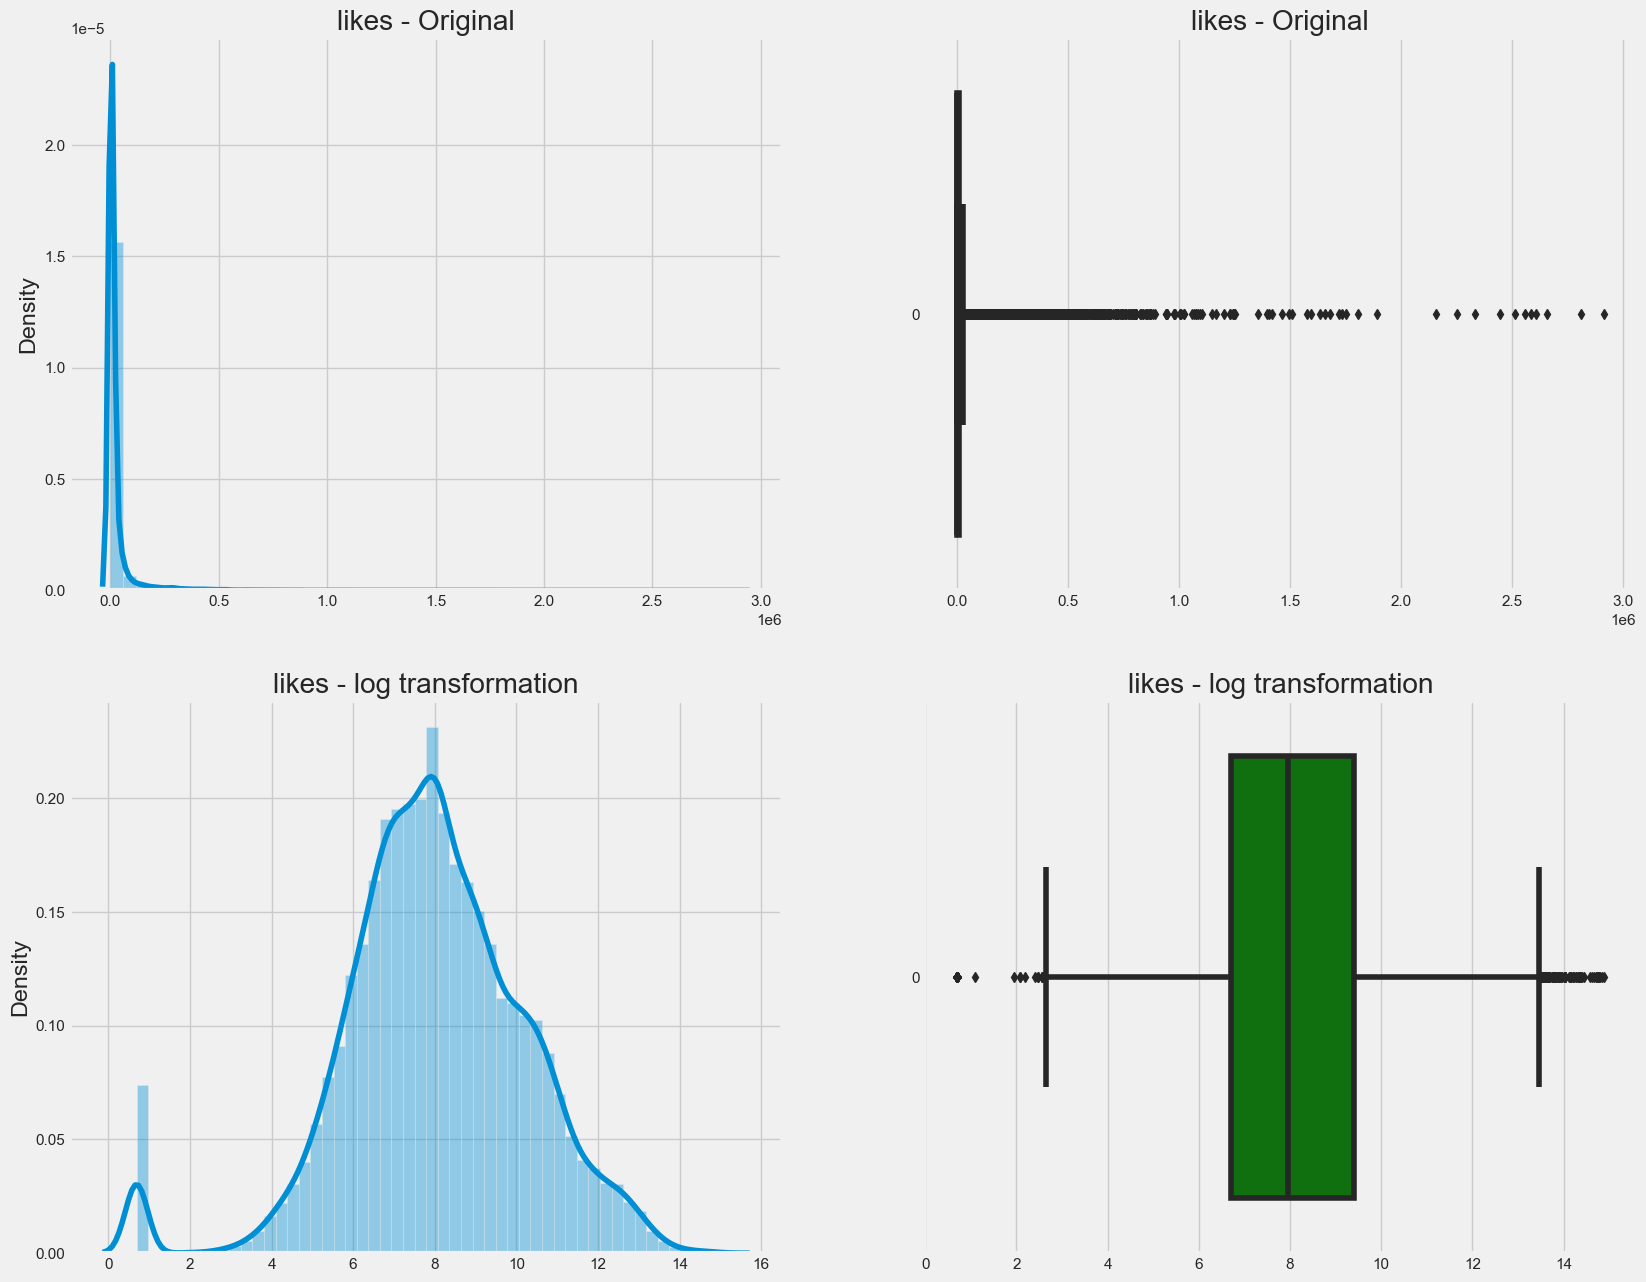

In [325]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

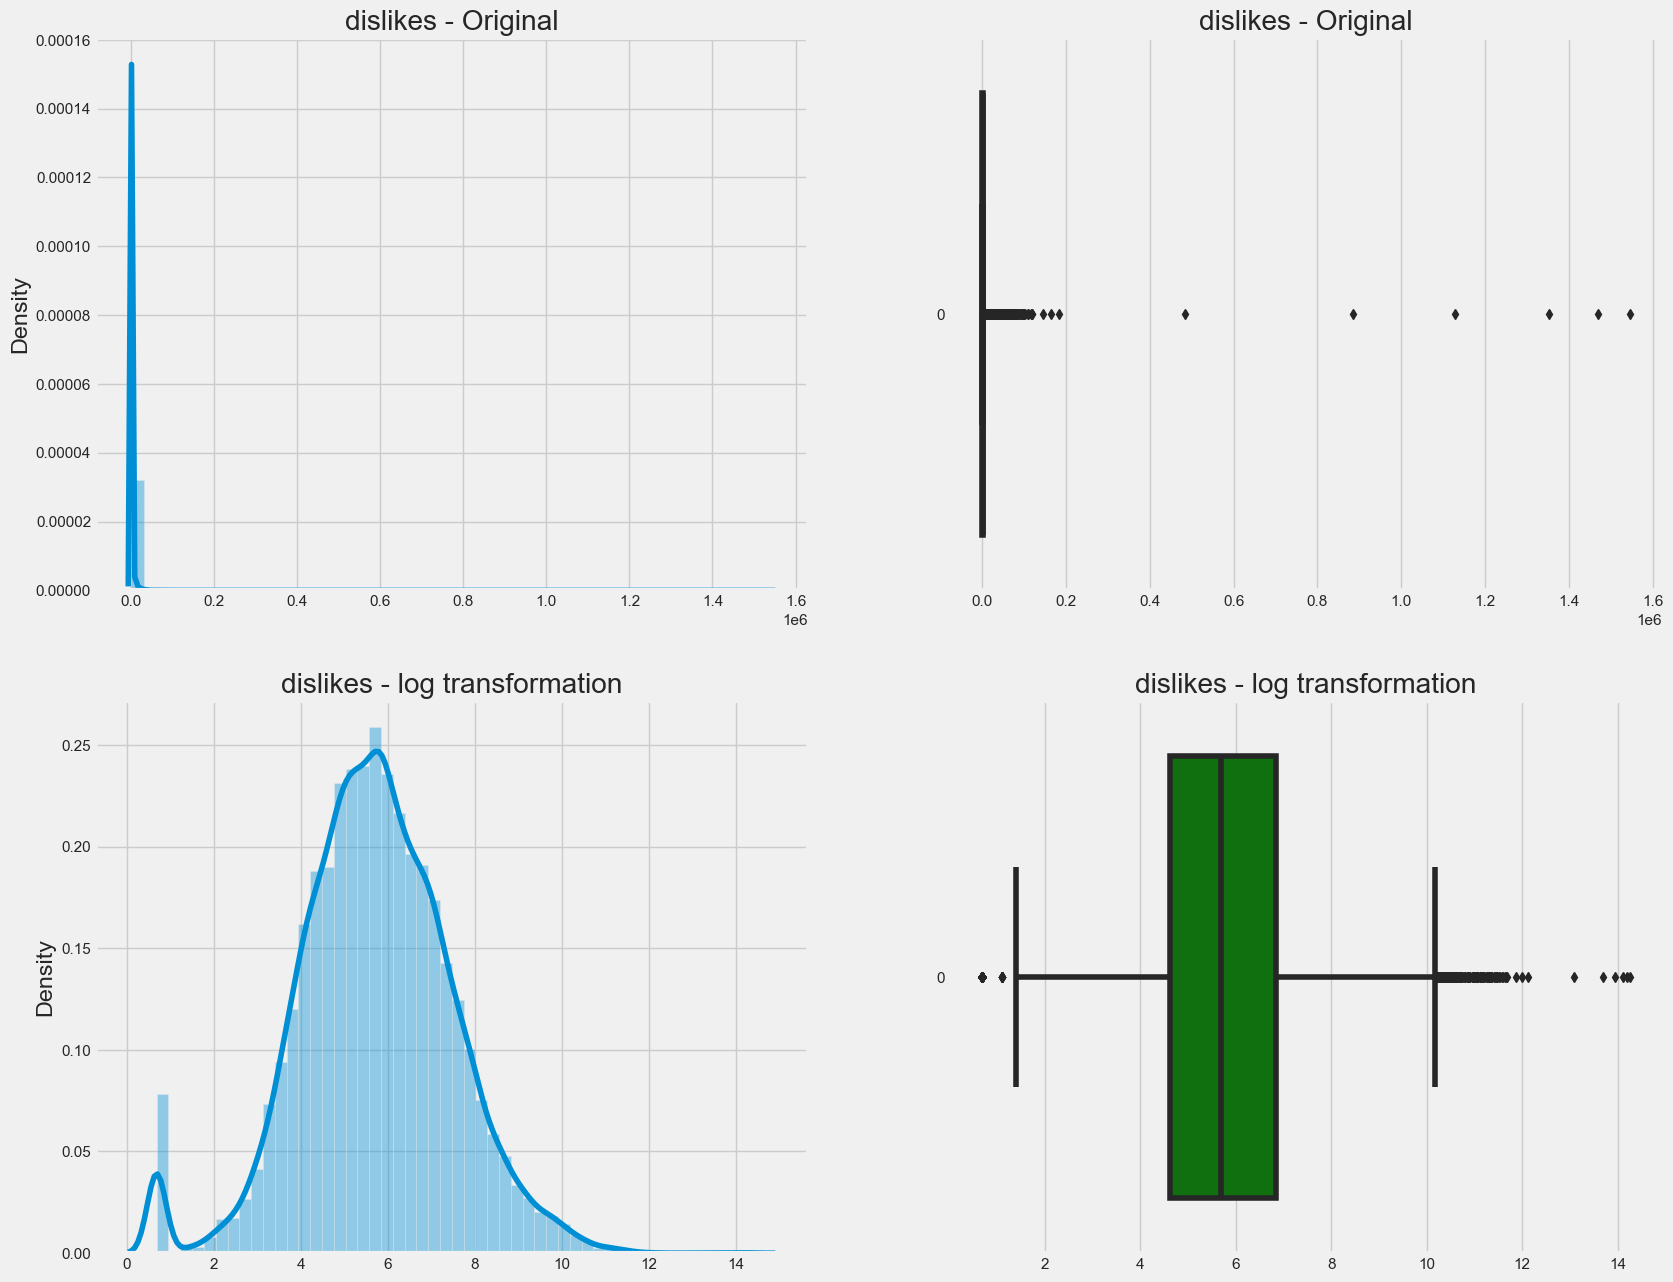

In [326]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

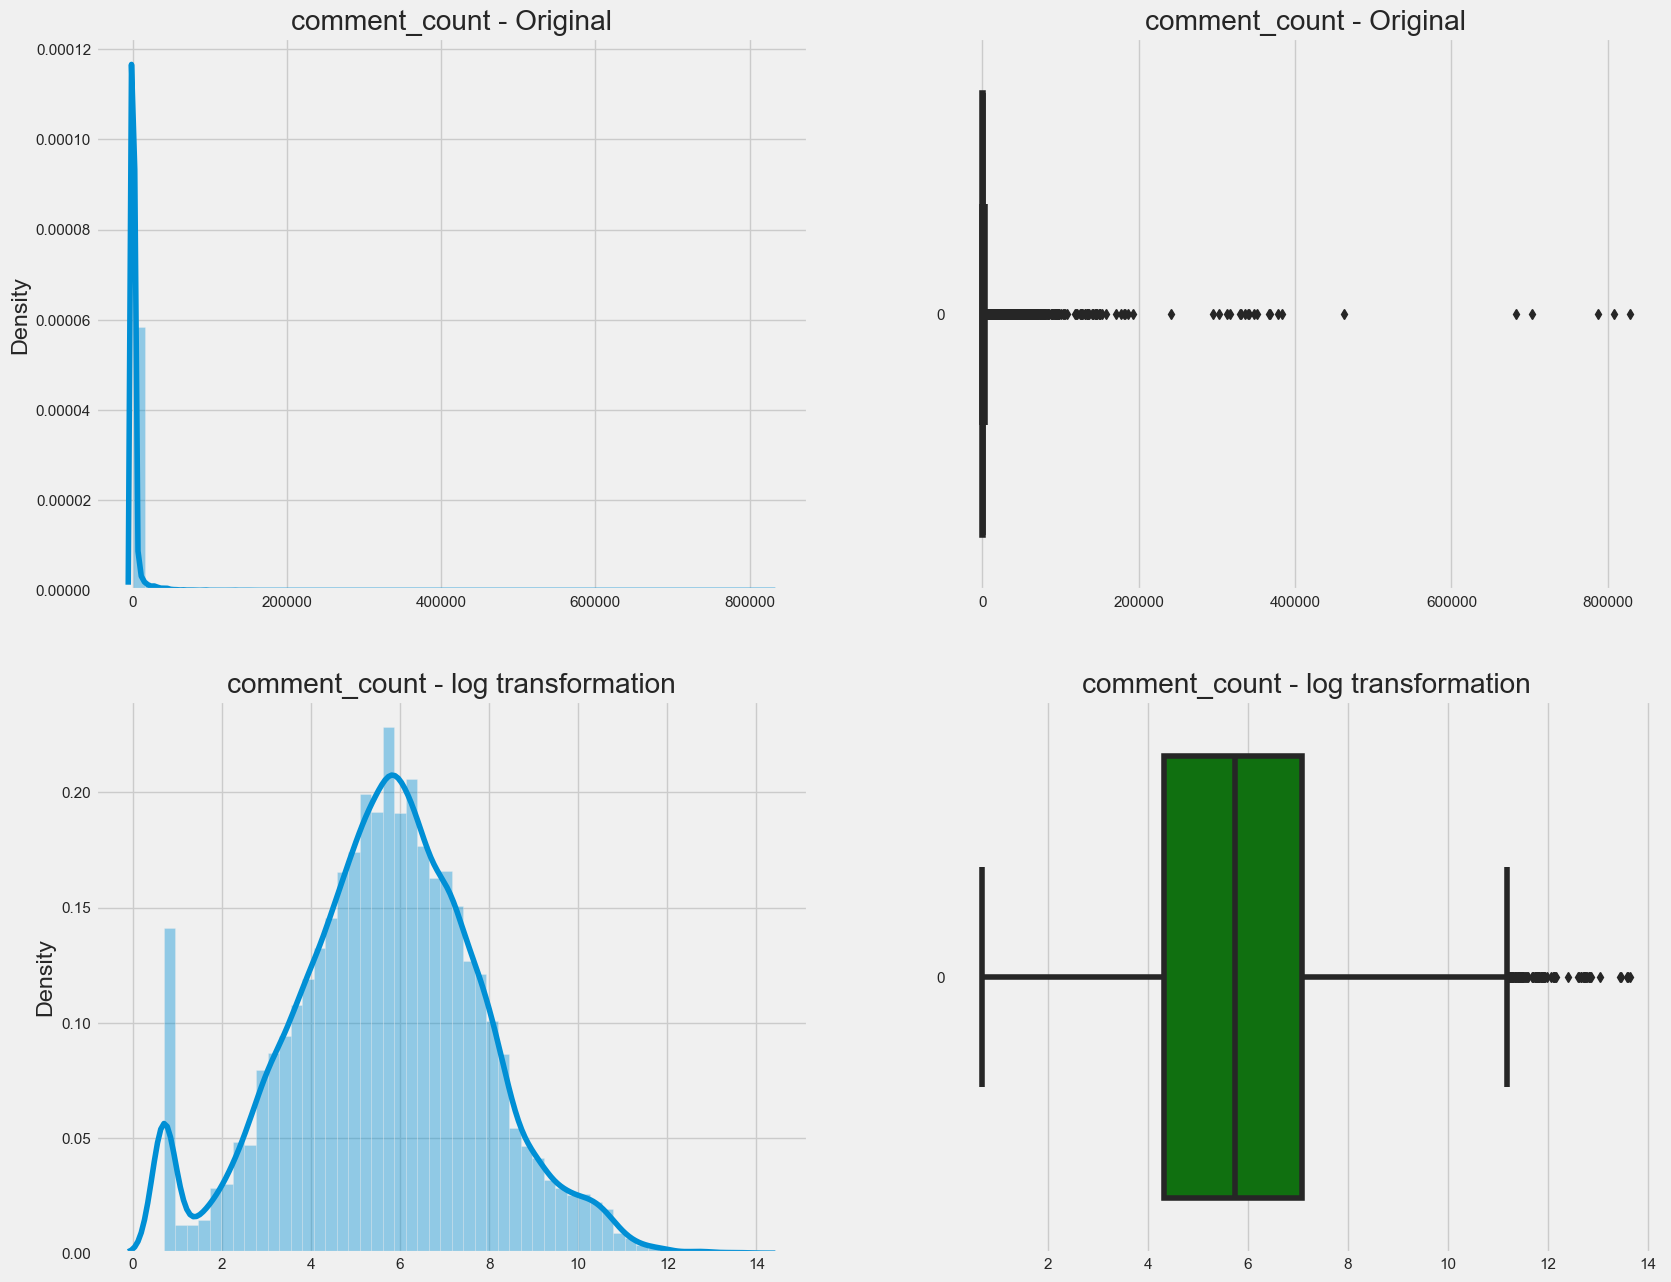

In [327]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

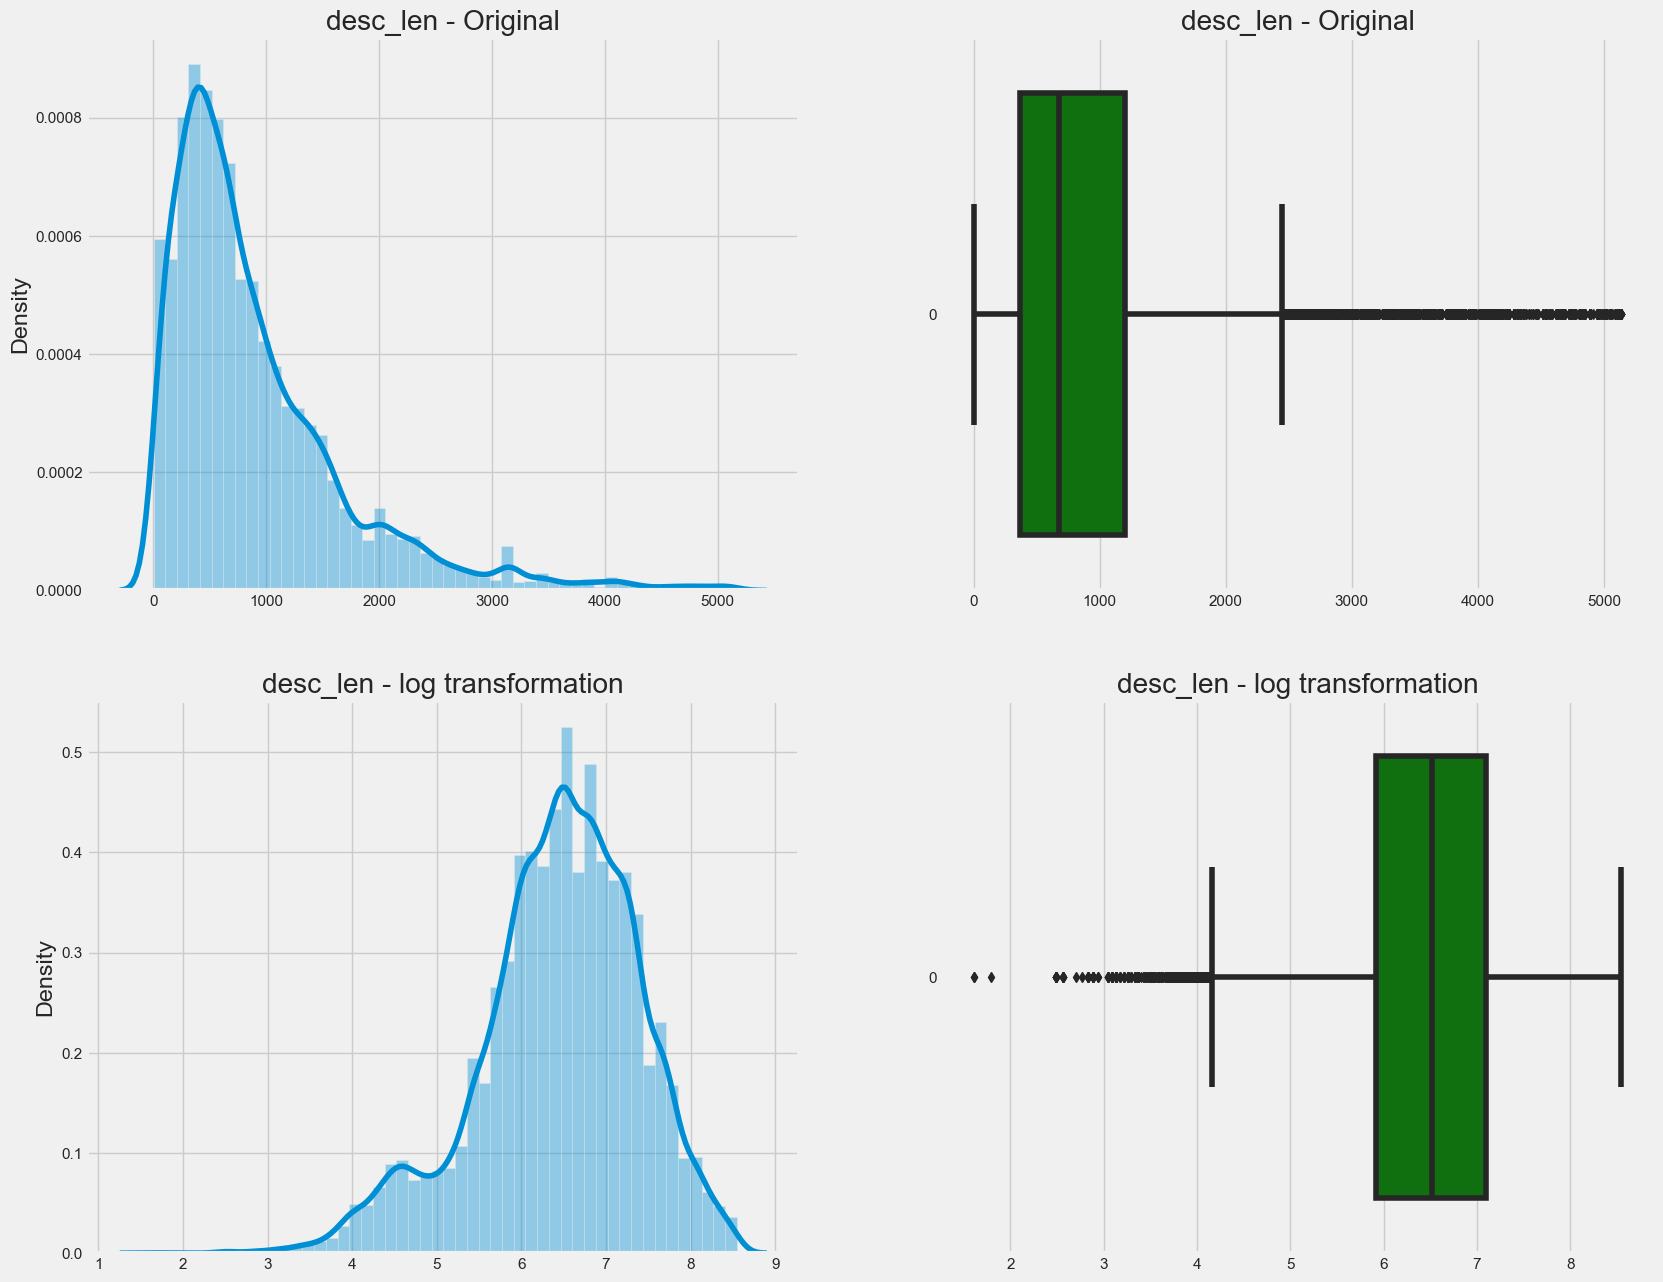

In [328]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

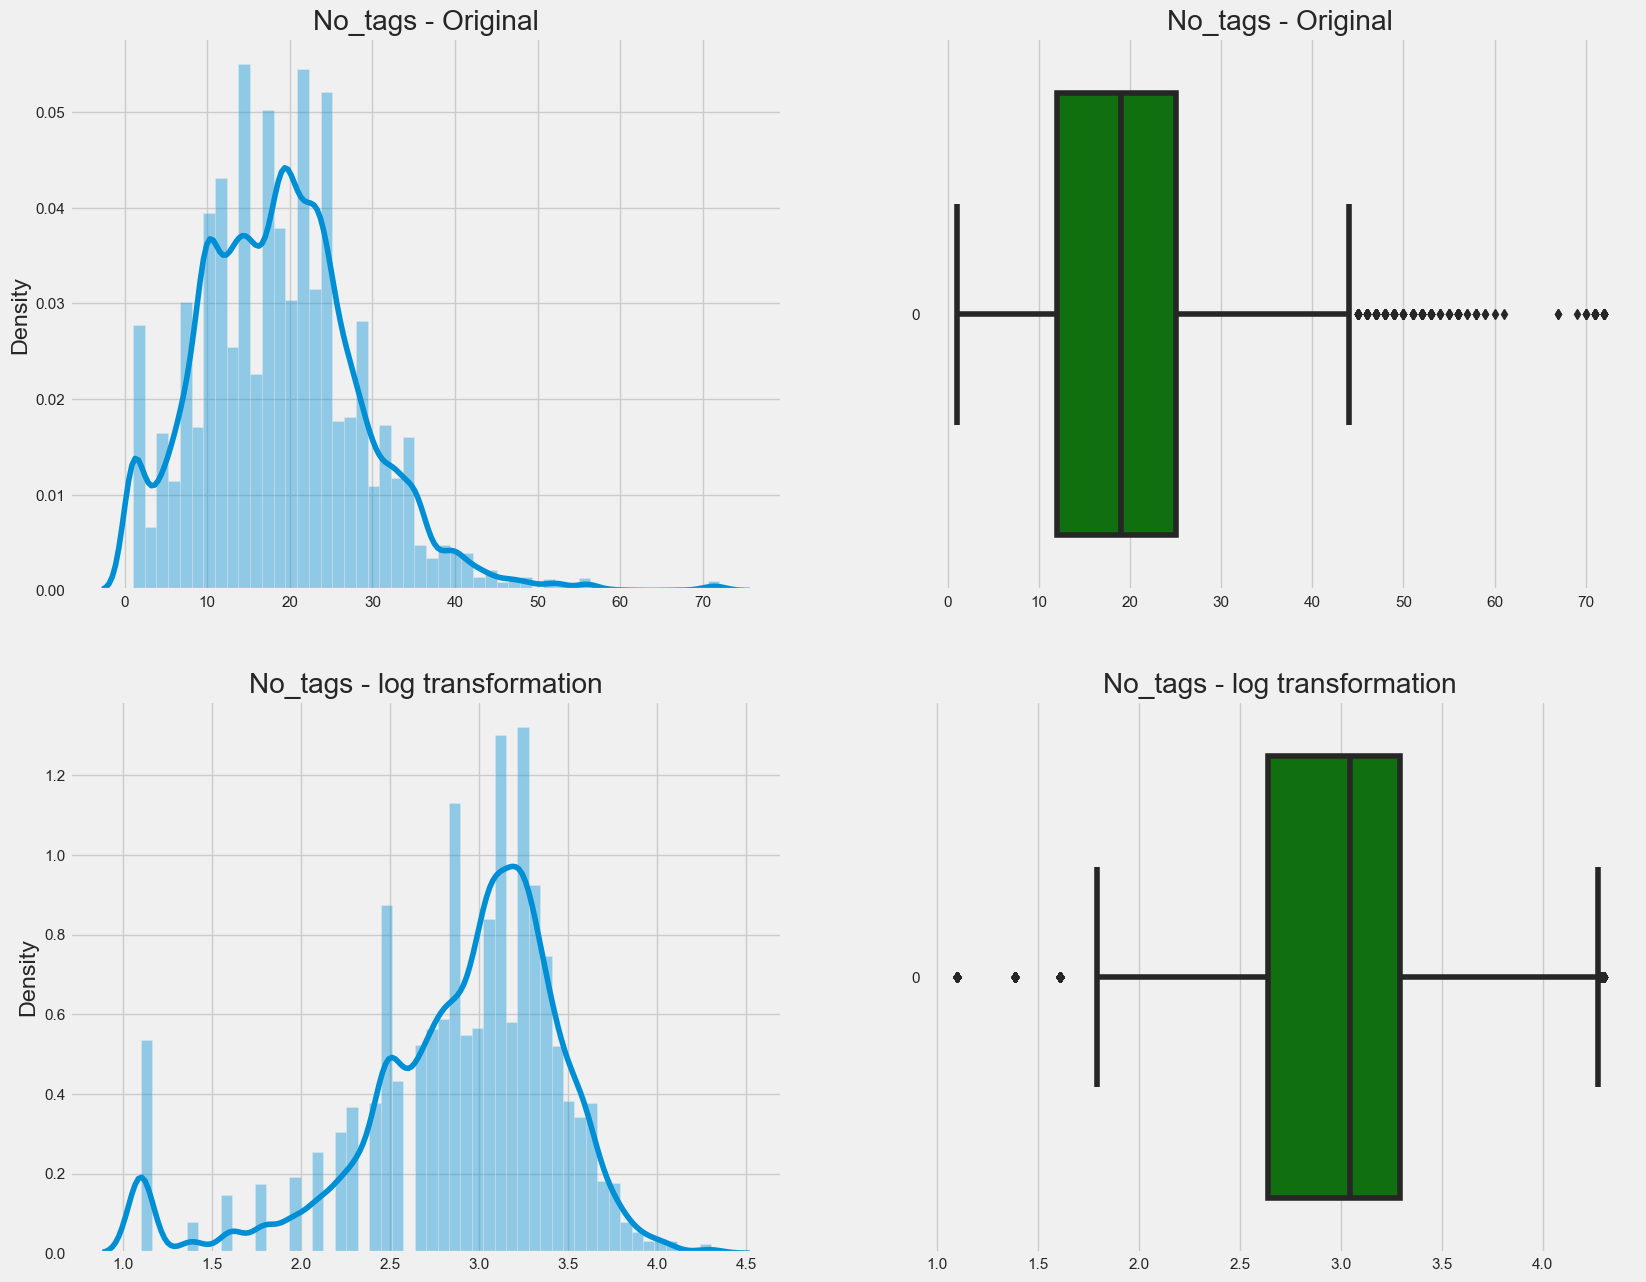

In [329]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

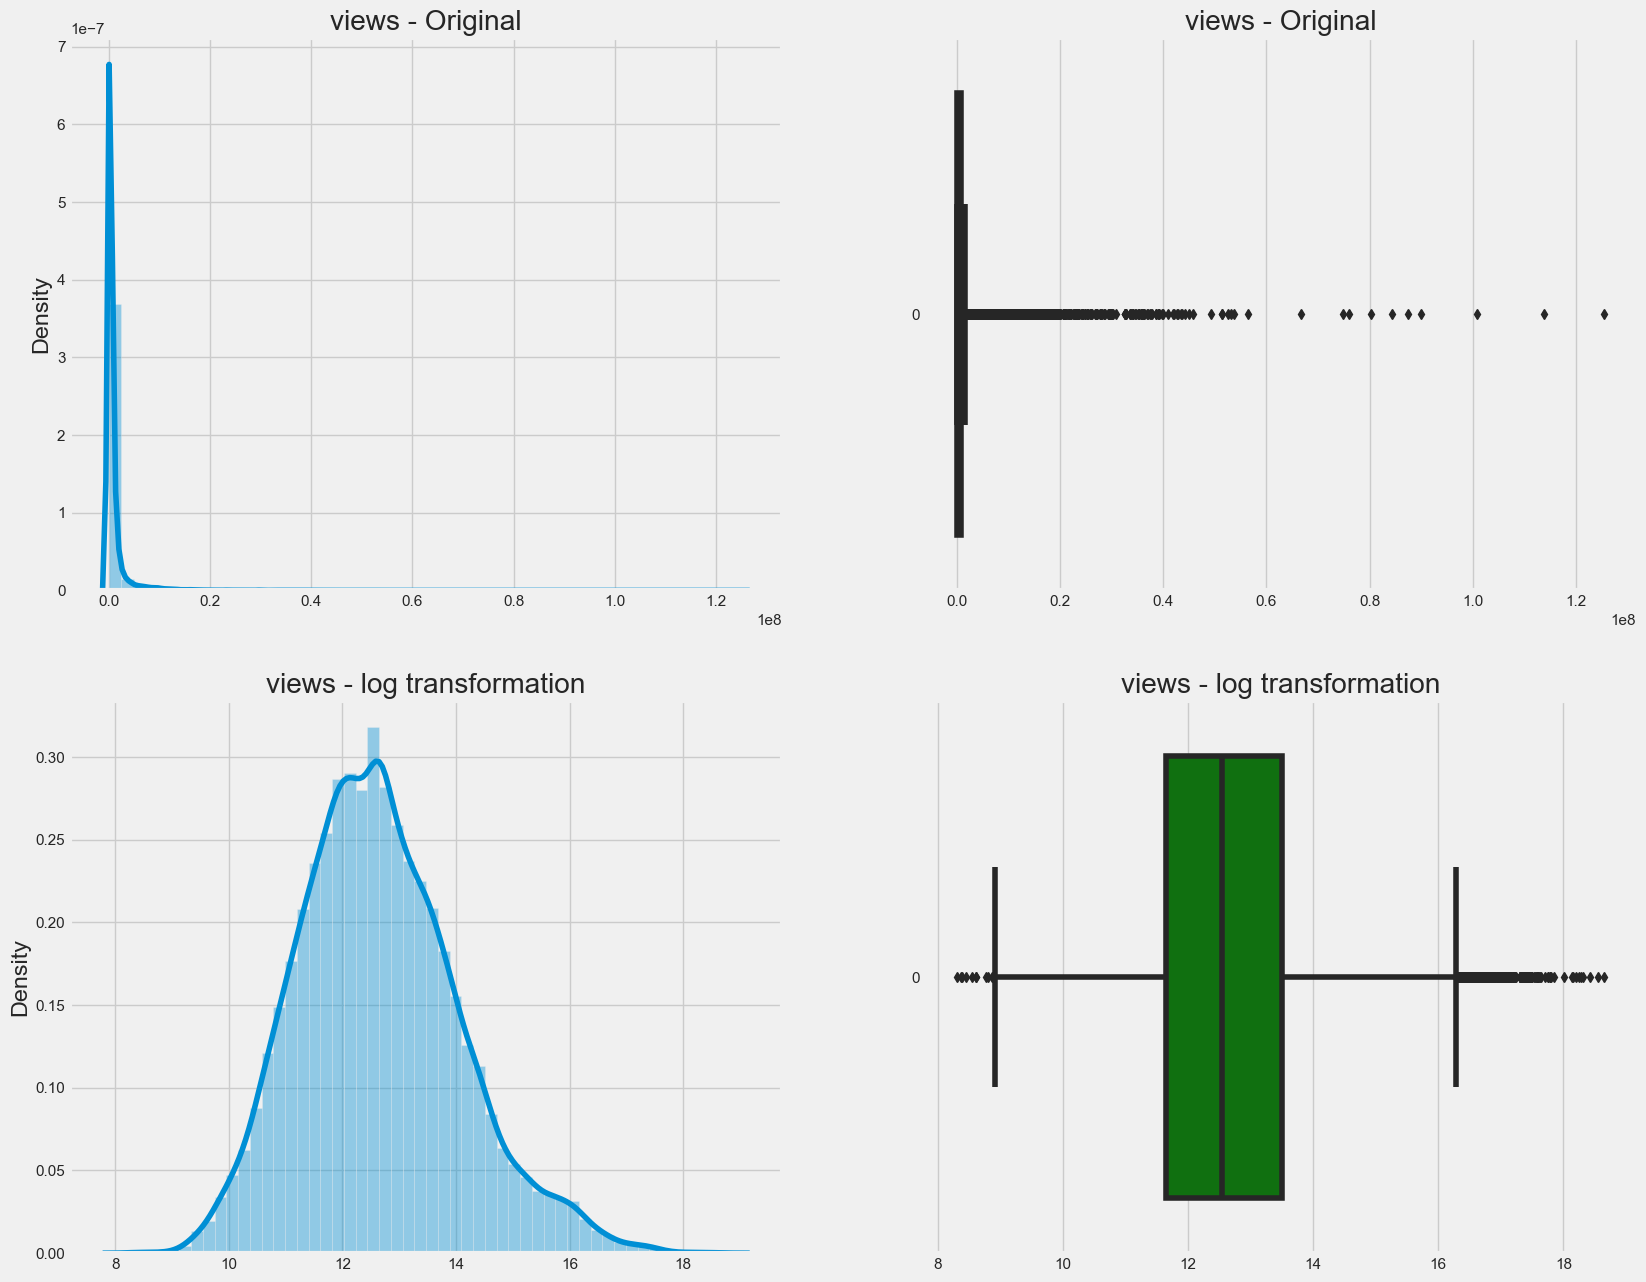

In [330]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [331]:
features = ['views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

## Normalization

In [332]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [333]:
data_clean.describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.278600e+04,3.278600e+04,3.278600e+04,32786.000000,32786.000000,32786.000000,32786.000000
mean,1.002314e+06,2.579847e+04,1.588133e+03,2546.466541,18.875770,908.972702,70.995486
std,3.161228e+06,9.688676e+04,1.697307e+04,14836.099544,9.765865,802.070019,22.149367
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.150065e+05,8.070000e+02,1.000000e+02,74.000000,12.000000,370.000000,54.000000
50%,2.815135e+05,2.862500e+03,2.970000e+02,311.000000,19.000000,677.000000,74.000000
75%,7.338022e+05,1.213625e+04,9.357500e+02,1177.000000,25.000000,1203.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [334]:
df_pre.head()

,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,...,log_No_tags,log_desc_len,log_len_title,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,17.14.11,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,920.0,...,2.772589,6.825460,4.406719,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,17.14.11,590101.0,735.0,904.0,0.0,True,False,False,19.0,2232.0,...,2.995732,7.711101,4.077537,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,17.14.11,473988.0,2011.0,243.0,149.0,False,False,False,14.0,482.0,...,2.708050,6.180017,4.077537,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,17.14.11,1242680.0,70353.0,1624.0,2684.0,False,False,False,20.0,263.0,...,3.044522,5.575949,3.433987,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,17.14.11,464015.0,492.0,293.0,66.0,False,False,False,11.0,753.0,...,2.484907,6.625392,4.488636,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


**Data Preprocessing**

**we take several steps in preprocessing</br>**

**1. Dropping the `publish_date`, `publish_time`, `description`, `tags`, `title`, and `channel_title` features because these features have their own unique value for each existing video**</br>
**2. Then we fill in the features that have missing values by using the mode of the feature (the `comments_disabled`, `video_error_or_removed`, and `ratings_disabled` features. This is done because this feature has categorical data so it's better to use the fill with the values that appear the most frequently.**</br>
**3. Features with numerical data are filled in with the median value of each feature, we do this because the median value is more representative of the entire data distribution and is also more robust even though there are outliers.**</br>
**4. After filling in the missing values, we drop 5067 duplicated data rows**</br>
**5. The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.**</br>
**6. Finally, we normalized so that the scale of each numeric feature has the same scale and it is hoped that it can simplify the process of learning the machine learning model data that we created..**</br>

# Split Train & Test

<Axes: >

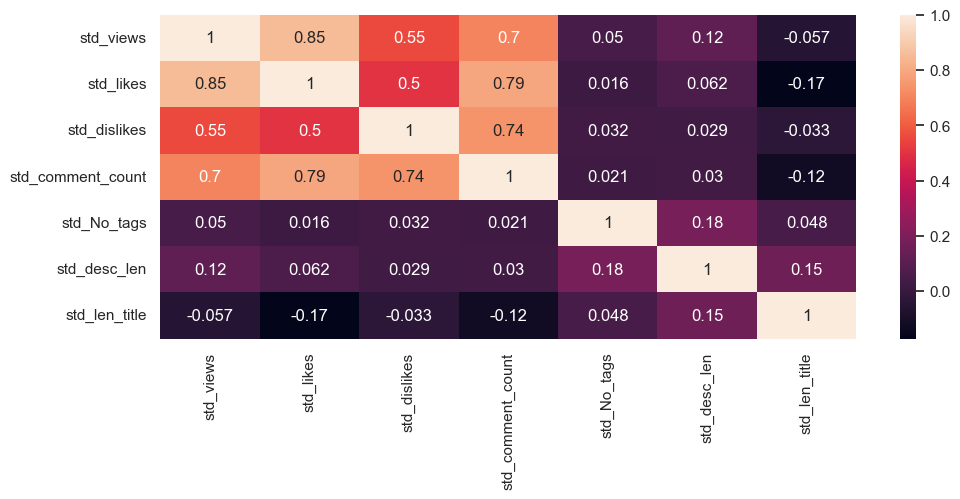

In [335]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)

In [336]:
x = df_pre[['std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] 
y = df_pre['std_views']

In [337]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

## Fit Model Simple Linear Regression

Fitting model to train set

In [338]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict

Predict the test set

In [339]:
pred = regressor.predict(xtest) #Predicting the views

In [340]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

## Evaluation

In [341]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [342]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 0.64484994  0.55459512 -0.23391618  0.00376948  0.00745842  0.00742813]
Intercept: 
 -0.0050528027179042
MAE: 0.01
RMSE: 0.01
R2 score: 0.80


# Ridge

In [343]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [344]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [ 0.5744645   0.29727968 -0.02053491  0.00397788  0.00814059  0.00721254]
Intercept: 
 -0.004851205001962148
MAE: 0.01
RMSE: 0.01
R2 score: 0.79


## Randomized Search

In [345]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [346]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: 0.20


# Lasso

In [347]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [348]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


## Randomized Search

In [349]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [350]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


# Decision Tree

In [351]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.95


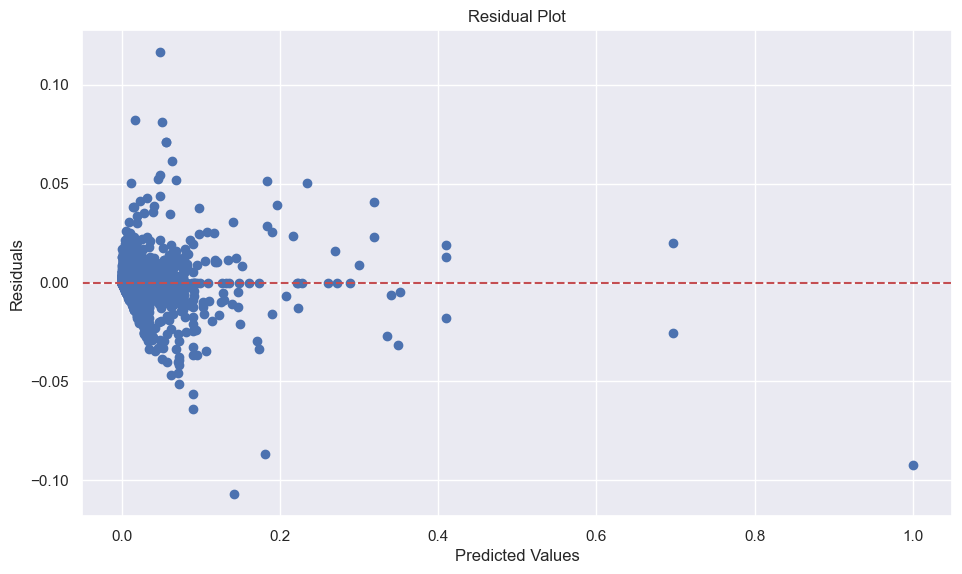

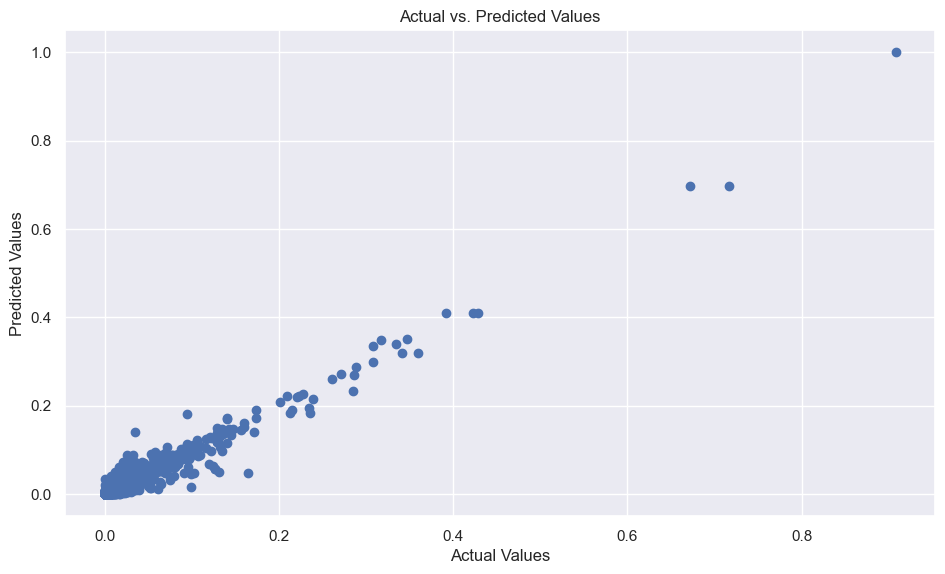

In [352]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)

# Residuals plot
residuals = ytest - pred
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(ytest, pred)
plt.xlabel('Actual Values')
plt.ylabel ('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()




# Random Forest

In [353]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 0.97


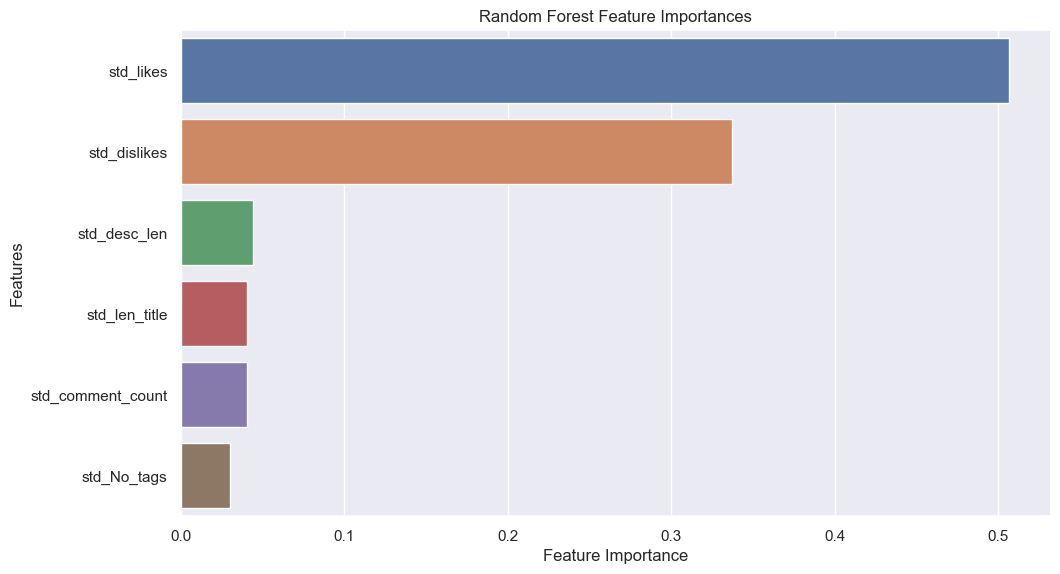

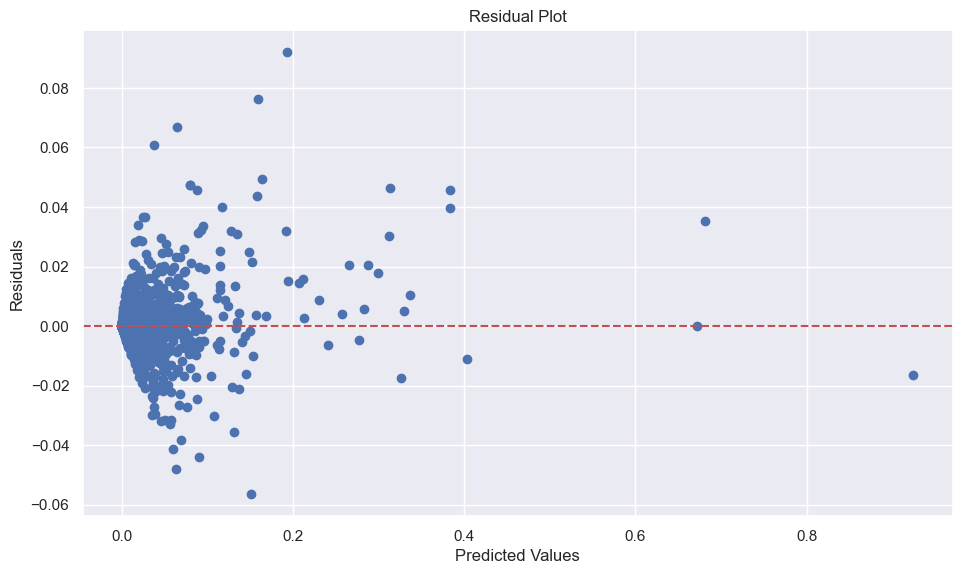

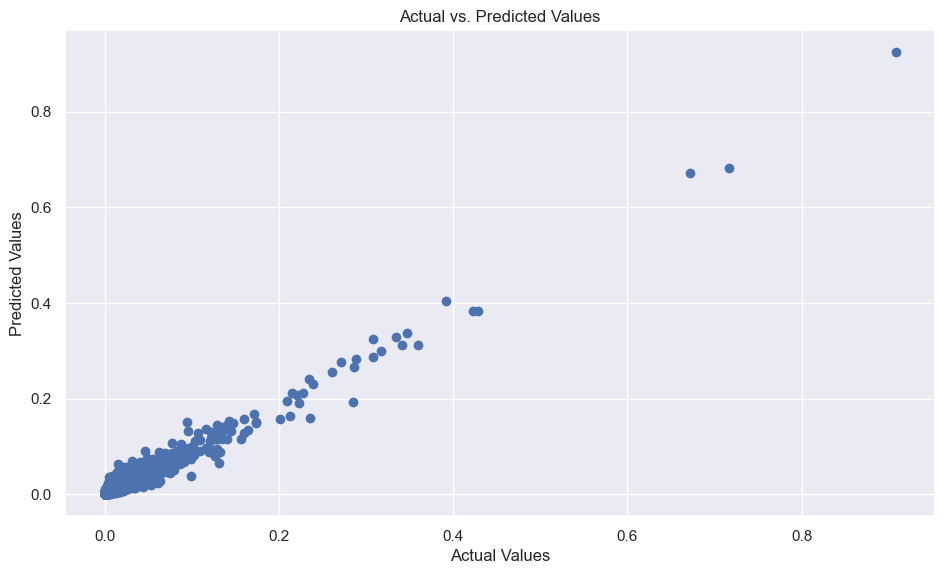

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your Random Forest model (best_model1) and made predictions (pred).

# Feature importances plot
feature_importances = best_model1.feature_importances_
feature_names = xtrain.columns  # Replace with your feature names
sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

# Residuals plot
residuals = ytest - pred
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(ytest, pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## SVM

MAE: 0.06
RMSE: 0.06
R2 score: -3.61


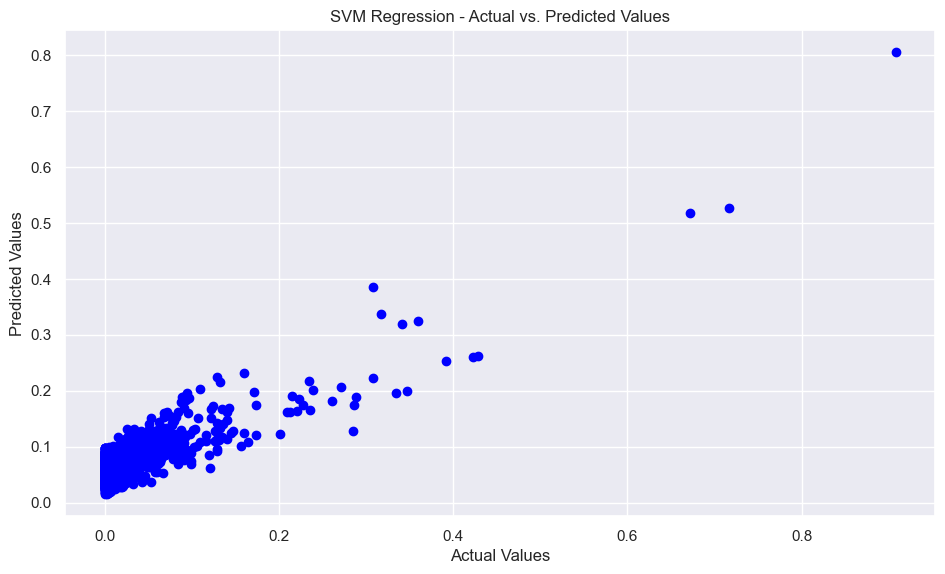

In [355]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')  

svm_regressor.fit(xtrain, ytrain)

y_pred = svm_regressor.predict(xtest)

eval_regression(svm_regressor, y_pred, xtrain, ytrain, xtest, ytest)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression - Actual vs. Predicted Values')
plt.show()


## KNN

MAE: 0.00
RMSE: 0.01
R2 score: 0.90


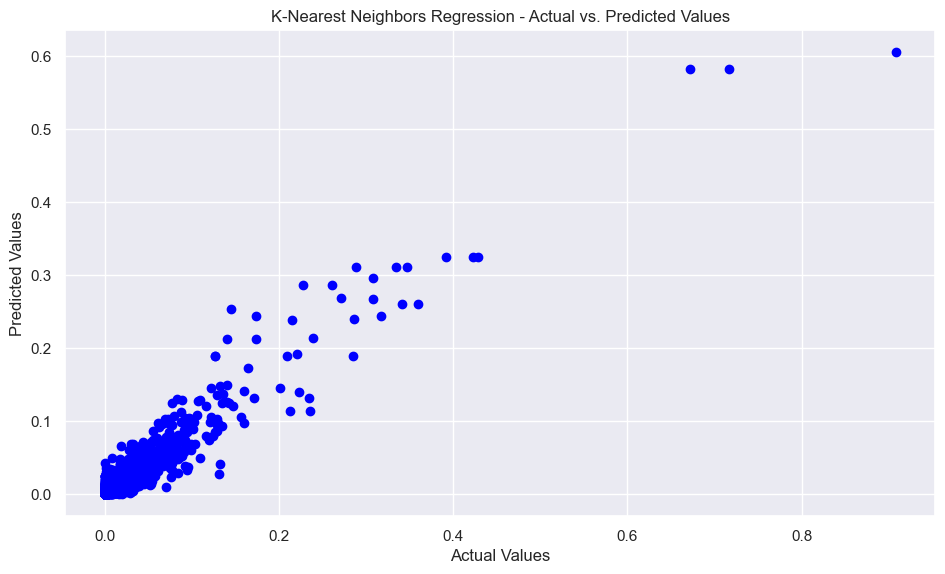

In [356]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  

knn_regressor.fit(xtrain, ytrain)

y_pred = knn_regressor.predict(xtest)

eval_regression(knn_regressor, y_pred, xtrain, ytrain, xtest, ytest)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Regression - Actual vs. Predicted Values')
plt.show()


## Gradient Descent

Final Weights (Coefficients): [0.00681498 0.00143097 0.00297482 0.00557085 0.00644029 0.00647501]
MAE: 0.01
RMSE: 0.03
R2 score: 0.01


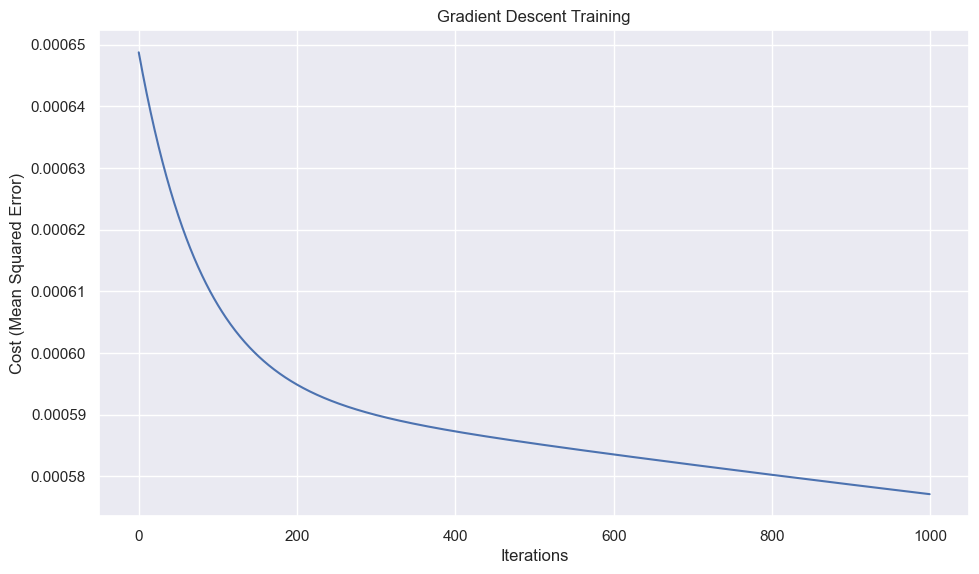

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

learning_rate = 0.01
num_iterations = 1000

weights = np.zeros(xtrain.shape[1])

cost_history = []

for i in range(num_iterations):
    y_pred = np.dot(xtrain, weights)
    error = y_pred - ytrain
    cost = np.mean(error ** 2)
    cost_history.append(cost)
    gradient = np.dot(xtrain.T, error) / len(ytrain)
    weights -= learning_rate * gradient

print("Final Weights (Coefficients):", weights)

y_pred_test = np.dot(xtest, weights)
eval_regression(weights, y_pred_test, xtrain, ytrain, xtest, ytest)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent Training")
plt.show()


Text(0.5, 1.0, 'feature importance score')

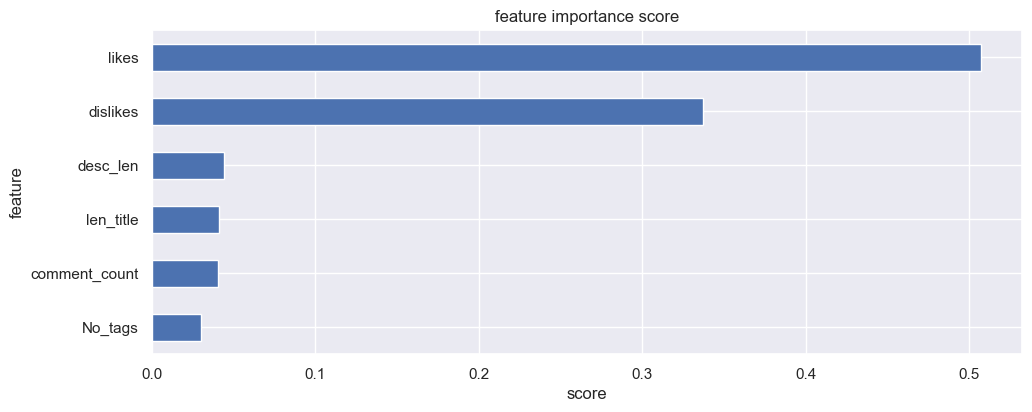

In [358]:
X=data[['likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Save Model

In [359]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [360]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.9717283735201034


In [361]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain)*100,2)), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest)*100,2)), '%')

train accuracy :  99.27 %
test accuracy :  97.17 %


**The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits, where the train accuracy has a value of 99.27% and the test accuracy has a value of 97.17%.**

# Conclusion

**Based on the experiments that have been carried out, there are several models that are good for determining the views of Youtube videos** </br>
**1. Random Forest with MAE 0.00, RMSE 0.01, and R2 of 0.97 makes Random Forest the best model so far**</br>
**2. Decision Tree is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.94**</br>
**3. KNN is the Third best model with MAE values of 0.00, RMSE 0.01, and R2 of 0.90**</br>
**4. Simple Linear Regression is the next best model with MAE values of 0.01, RMSE 0.01, and R2 of 0.80**</br>
**5. a very influential feature is the number of likes and dislikes of a video**